<a href="https://colab.research.google.com/github/kafSaugat7/Genetic_Algorithm/blob/main/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Generation 1:
Chromosome 1: 10100100111 = -4.609375, Fitness: 16.445801
Chromosome 2: 00001101011 = 1.671875, Fitness: 10.949707
Chromosome 3: 00100011111 = 4.484375, Fitness: 59.641113
Chromosome 4: 00101101100 = 5.687500, Fitness: 90.132812

Generation 2:
Chromosome 1: 00001101011 = 1.671875, Fitness: 10.949707
Chromosome 2: 10100100111 = -4.609375, Fitness: 16.445801
Chromosome 3: 00100100010 = 4.531250, Fitness: 60.720703
Chromosome 4: 10111001000 = -7.125000, Fitness: 62.906250

Generation 3:
Chromosome 1: 00001101011 = 1.671875, Fitness: 10.949707
Chromosome 2: 10100100111 = -4.609375, Fitness: 16.445801
Chromosome 3: 10000101010 = -0.656250, Fitness: 5.419922
Chromosome 4: 10111011011 = -7.421875, Fitness: 70.059082

Generation 4:
Chromosome 1: 10000101010 = -0.656250, Fitness: 5.419922
Chromosome 2: 00001101011 = 1.671875, Fitness: 10.949707
Chromosome 3: 00001101111 = 1.734375, Fitness: 11.687988
Chromosome 4: 00000011110 = 0.468750, Fitness: 0.216797

Generation 5:
Chromosom

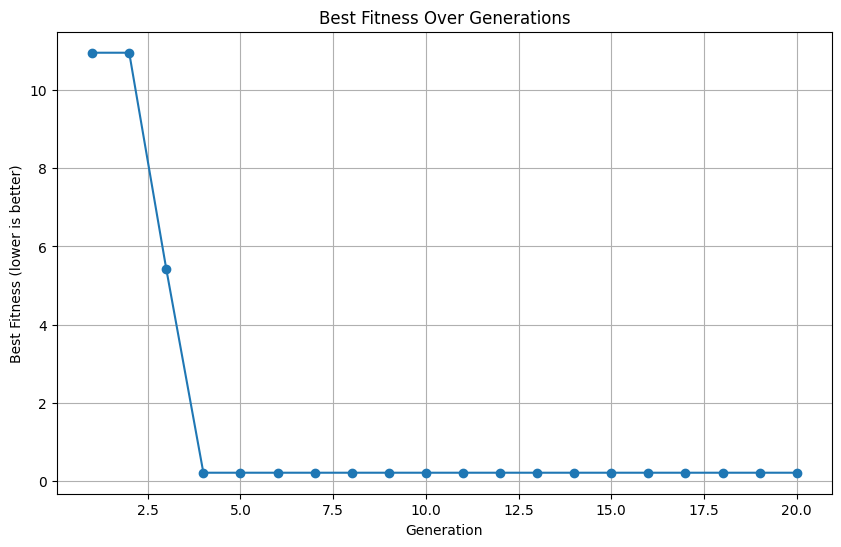

In [ ]:
import random
import matplotlib.pyplot as plt

# [All previous functions remain the same]

# Main genetic algorithm
def genetic_algorithm():
    population_size = 4
    generations = 20  # Increased for better visualization
    best_fitnesses = []

    # Create initial population
    population = [create_chromosome() for _ in range(population_size)]

    for generation in range(generations):
        print(f"\nGeneration {generation + 1}:")

        # Decode chromosomes and calculate fitness
        decoded = [decode_chromosome(chrom) for chrom in population]
        fitness_scores = [calculate_fitness(x) for x in decoded]

        # Print current population
        for i, (chrom, x, fitness) in enumerate(zip(population, decoded, fitness_scores)):
            print(f"Chromosome {i + 1}: {''.join(map(str, chrom))} = {x:.6f}, Fitness: {fitness:.6f}")

        # Store the best fitness of this generation
        best_fitnesses.append(min(fitness_scores))

        # Select two best chromosomes as parents
        parents = [x for _, x in sorted(zip(fitness_scores, population))[:2]]

        # Create new population
        new_population = parents.copy()

        # Add one offspring from crossover
        child = crossover(parents[0], parents[1])
        new_population.append(mutate(child))

        # Add one random chromosome
        new_population.append(create_chromosome())

        population = new_population

    # Print final best solution
    best_chromosome = min(population, key=lambda c: calculate_fitness(decode_chromosome(c)))
    best_solution = decode_chromosome(best_chromosome)
    print(f"\nBest solution found: x = {best_solution:.6f}")
    print(f"Fitness: {calculate_fitness(best_solution):.6f}")

    # Plot the best fitness over generations
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, generations + 1), best_fitnesses, marker='o')
    plt.title('Best Fitness Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness (lower is better)')
    plt.grid(True)
    plt.show()

# Run the genetic algorithm
genetic_algorithm()